<a href="https://colab.research.google.com/github/J-o-y-y/codeslave/blob/main/%EB%82%98%EC%9D%B4%EB%B8%8C%EB%B2%A0%EC%9D%B4%EC%A6%88%EB%B6%84%EB%A5%98(NaiveBayesClassifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

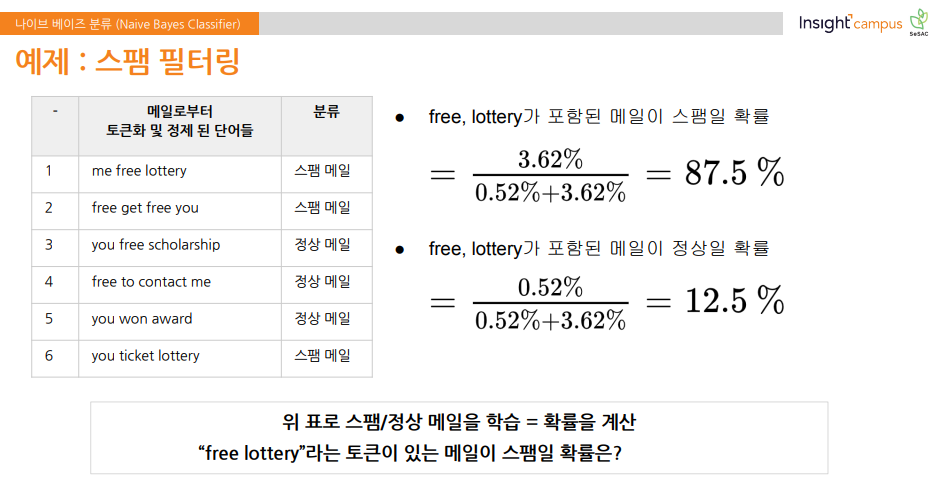

주어진 텍스트 데이터를 사용하여 스팸 메일과 정상 메일을 구별하는 스팸 필터링.

나이브 베이즈 분류기(Naive Bayes Classifier)를 활용하여 훈련 데이터를 기반으로 스팸과 정상 메일의 확률을 계산하고, 각 메일을 분류.

프로젝트는 주어진 훈련 데이터셋을 사용하여 스팸 메일과 정상 메일에 대한 사전 확률 및 단어 등장 확률을 계산하는 과정을 포함.

입력 텍스트를 토큰화하고, 각 단어의 확률을 이용하여 주어진 텍스트가 스팸 메일 또는 정상 메일로 분류되는지 결정.

이 프로젝트를 통해 입력 텍스트의 확률을 계산하여 스팸 메일 필터링을 수행하고, 메일을 스팸 또는 정상 메일로 분류하는데 사용.

In [1]:
import math

# 훈련 데이터셋
training_set = [
    ['mefreelottery', '스팸메일'],
    ['freegetfreeyou', '스팸메일'],
    ['youfreescholarship', '정상메일'],
    ['freetocontactme', '정상메일'],
    ['youwonaward', '정상메일'],
    ['youticketlottery', '스팸메일']
]

# 사전 확률 계산
total_emails = len(training_set)
spam_emails = [email for email in training_set if email[1] == '스팸메일']
normal_emails = [email for email in training_set if email[1] == '정상메일']

p_spam = len(spam_emails) / total_emails
p_normal = len(normal_emails) / total_emails

# 각 단어의 확률 계산
def calculate_word_probabilities(emails, word):
    total_words = sum(len(email[0]) for email in emails)
    word_count = sum(email[0].count(word) for email in emails)
    return (word_count + 1) / (total_words + len(emails))

# 입력 텍스트 분류
def classify_email(input_text):
    words = input_text.split()

    p_spam_given_words = p_spam
    p_normal_given_words = p_normal

    for word in words:
        p_spam_given_words *= calculate_word_probabilities(spam_emails, word)
        p_normal_given_words *= calculate_word_probabilities(normal_emails, word)

    if p_spam_given_words > p_normal_given_words:
        return '스팸메일'
    else:
        return '정상메일'

# 테스트 데이터
test_email = 'free lottery'
result = classify_email(test_email)
print(f'입력 텍스트 "{test_email}"는 {result} 입니다.')


입력 텍스트 "free lottery"는 스팸메일 입니다.
